We are looking at the Y combinator dataset from https://www.kaggle.com/benhamner/y-combinator-companies.

Publicly launched YC companies funded from summer 2005 to summer 2016

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set_style("white", {'ytick.major.size': 10.0})
sns.set_context("poster", font_scale = 1.0)

In [2]:
df = pd.read_csv('companies.csv')
df.tail()

,name,vertical,year,batch,url,description
878,Xberts,Marketplace,2016,s2016,https://www.xberts.com,Xberts.com is a cross-border marketplace for C...
879,YesGraph,B2B,2016,s2016,http://yesgraph.com,YesGraph recommends exactly who a user should ...
880,Yoshi,Consumer,2016,s2016,https://www.startyoshi.com,Gas delivered to your car so you never have to...
881,ZeroDB,Developer Tools,2016,s2016,http://zerodb.com,Enterprise security and encryption for big dat...
882,ohmygreen,B2B,2016,s2016,http://www.ohmygreen.com,"We make employees healthy, happy, productive, ..."


### Checking data
First, see if there any repeated entries.

In [3]:
print('There are {} companies in this data set'.format(df.shape[0]))
print('{} unique company names.'.format(len(df['name'].unique())))

There are 883 companies in this data set
883 unique company names.


There are no repeated entries.

Next, check how much of the data is NaN

In [17]:
# percentage of each column that is NaN
nan_percentages = (df.isnull().sum()/df.shape[0])
nan_percentages

name           0.000000
vertical       0.010193
year           0.000000
batch          0.000000
url            0.001133
description    0.056625
dtype: float64

In [5]:
# I changed the year entries to ints 
# because I thought it might help some weird sorting issues later,
# but this might not be necessary
df['year'] = df['year'].astype('int')

### What type of companies are funded by Y combinator?

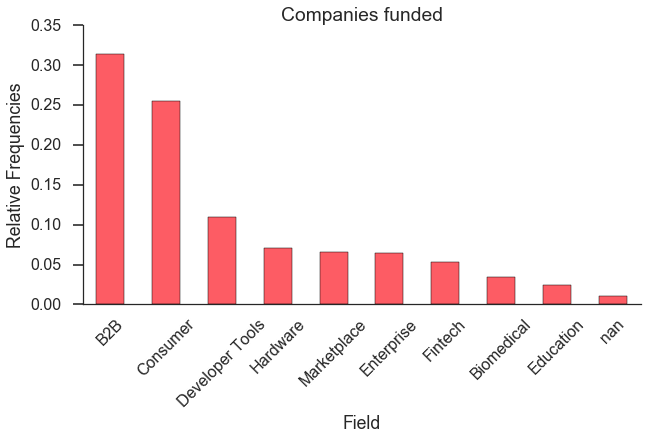

In [6]:
fig, ax = plt.subplots(figsize=(10,5))
df['vertical'].value_counts(normalize = True, dropna=False).plot(kind= 'bar', rot = 45, color='#FD5C64')
plt.xlabel('Field')
plt.ylabel('Relative Frequencies')
ax.set_title('Companies funded')
sns.despine()

# B2B means business to business. 
# one business makes a commercial transition with another

~30% & 25% of companies are B2B and Consumer

Next, look at how many companies funded each year

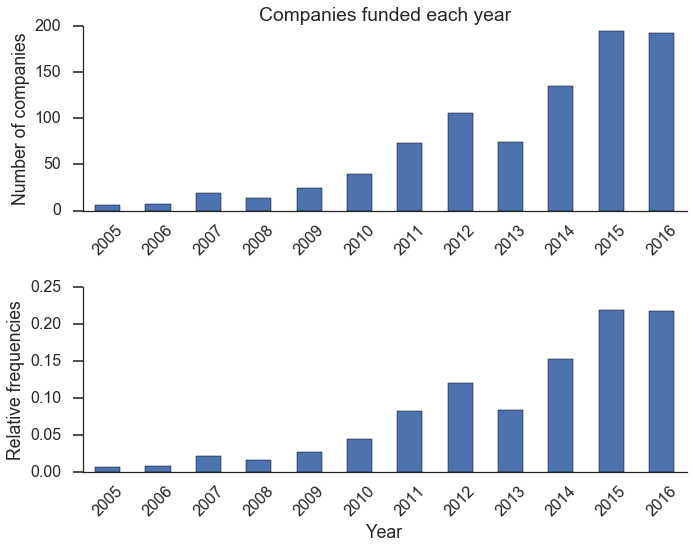

In [76]:
fig, ax = plt.subplots(2,1,figsize=(10,8))
# abs counts
df['year'].value_counts(sort = False,ascending = True, normalize = False).plot(kind = 'bar', rot = 45, ax = ax[0])
# normalized
df['year'].value_counts(sort = False,ascending = True, normalize = True).plot(kind = 'bar', rot = 45, ax = ax[1])

# labels
plt.xlabel('Year')
ax[0].set_ylabel('Number of companies')
ax[0].set_title('Companies funded each year')
ax[1].set_ylabel('Relative frequencies')
# aesthetics
sns.despine()
plt.tight_layout()
plt.show()

In [82]:
# Check to see if values in bar chart correct
print(df.year.value_counts(sort = False))
print(df.year.value_counts(sort = False, normalize= True), '\nSum:', df.year.value_counts(sort = False, normalize= True).sum())

2005      6
2006      7
2007     19
2008     14
2009     24
2010     39
2011     73
2012    106
2013     74
2014    135
2015    194
2016    192
Name: year, dtype: int64
2005    0.006795
2006    0.007928
2007    0.021518
2008    0.015855
2009    0.027180
2010    0.044168
2011    0.082673
2012    0.120045
2013    0.083805
2014    0.152888
2015    0.219706
2016    0.217441
Name: year, dtype: float64 
Sum: 1.0


Data seems to be plotted correctly.
Increase in companies being funded per year seems to be pretty constant, with a slight dip in 2013, but that decrease in 2013 is made up in 2014. 

### Is there a difference in number of companies between seasons?



In [9]:
s_batch = df[df['batch'].str.contains('s')]
w_batch = df[df['batch'].str.contains('w')]

print('There are {} companies from summer, and {} from winter.'
      .format(s_batch.shape[0], w_batch.shape[0]))

print('\n{}% of companies are in summer, and {}% are in winter.'
      .format((s_batch.shape[0]/df.shape[0])*100, 
              (w_batch.shape[0]/df.shape[0])*100))


There are 450 companies from summer, and 433 from winter.

50.962627406568515% of companies are in summer, and 49.037372593431485% are in winter.


Even split between the two batches overall

### How do the number of companies change between summer and winter?

Seems to be fairly even between the two seasons except 2016

In [11]:
# Double checking values in plot above

print('Winter:\n{}'.format(w_batch.year.value_counts(sort = False)))
print('Summer:\n{}'.format(s_batch.year.value_counts(sort = False)))

Winter:
2006      4
2007      9
2008      8
2009      9
2010     15
2011     34
2012     49
2013     37
2014     62
2015     95
2016    111
Name: year, dtype: int64
Summer:
2005     6
2006     3
2007    10
2008     6
2009    15
2010    24
2011    39
2012    57
2013    37
2014    73
2015    99
2016    81
Name: year, dtype: int64


Winter batches usually smaller than summer, but looks like the winter 2016 batch impressed more than summer 2016.
Is the increase that much though?
### Want to see frequencies of summer and winter batches

In [88]:
# get counts by year and divide by total to get frequencies

s_batch_normed_list = []
for count in s_batch.groupby('year').size():
    s_batch_normed_list.append(count/len(s_batch))


w_batch_normed_list = []
w_batch_normed_list.append(0.0) # no winter 2005 data
for count in w_batch.groupby('year').size():
    w_batch_normed_list.append(count/len(s_batch))

# make a new dataframe with frequencies for plotting
idx = [2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]
df_batch_normed = pd.DataFrame(s_batch_normed_list, index=idx)
df_batch_normed.columns = ['Summer Batch']

df_batch_normed['Winter Batch'] = w_batch_normed_list

print(df_batch_normed)

# Check to see if frequencies add up to 1
print('\nSums:      ',df_batch_normed['Summer Batch'].sum(), '       ', df_batch_normed['Winter Batch'].sum())

      Summer Batch  Winter Batch
2005      0.013333      0.000000
2006      0.006667      0.008889
2007      0.022222      0.020000
2008      0.013333      0.017778
2009      0.033333      0.020000
2010      0.053333      0.033333
2011      0.086667      0.075556
2012      0.126667      0.108889
2013      0.082222      0.082222
2014      0.162222      0.137778
2015      0.220000      0.211111
2016      0.180000      0.246667

Sums:       1.0         0.9622222222222223


Not sure where 4% of the winter batch is...

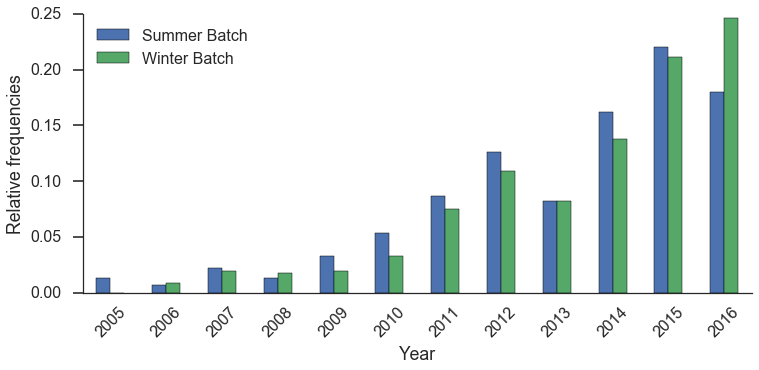

In [61]:
fig, ax = plt.subplots(figsize=(12,5))
df_batch_normed.plot(kind ='bar', ax=ax, rot = 45)

ax.set_ylabel('Relative frequencies')
ax.set_xlabel('Year')

sns.despine()

There is a ~5% difference between summer and winter batches in 2016, but the rest of the time, every batch looks about even

### Comparing winter/summer split by each year

The previous plots show us the frequencies as compared to the same seasons of other years.

The following will tells us more about the split between batches each year.

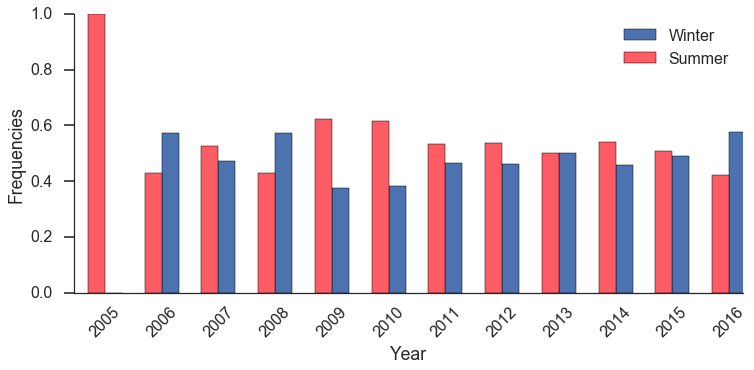

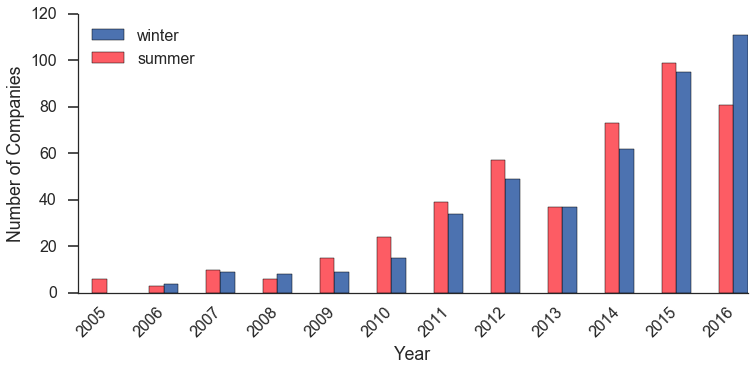

In [146]:
##### Frequencies of winter/summer batch each year

s_batch_normalize = s_batch.year.value_counts()/df.year.value_counts()
w_batch_normalize = w_batch.year.value_counts()/df.year.value_counts()

fig, ax = plt.subplots(figsize = (12,5))
w_batch_normalize.plot(kind='bar', ax = ax, width = 0.3, position = 0, label='Winter')
s_batch_normalize.plot(kind = 'bar', ax = ax, width = 0.3, color = '#FD5C64', position = 1, rot = 45, label = 'Summer')

ax.legend(loc='best')
ax.set_ylabel('Frequencies')
ax.set_xlabel('Year')

sns.despine()



##### Counts of winter/summer batch each year 
fig, ax = plt.subplots(figsize=(12,5))

ind = np.arange(12)

# data
# had to manuver position quite a bit to get the plot to display correctly
w_batch.year.value_counts(sort = False)\
    .plot(kind = 'bar', label = 'winter', position= -5, width = 0.25, ax = ax)

s_batch.year.value_counts(sort = False)\
    .plot(kind = 'bar', label = 'summer', position = 0, width =0.25, color='#FD5C64', ax = ax)


ax.set_ylabel('Number of Companies')
ax.set_xlabel('Year')

ax.legend(loc='best')
plt.xticks(ind, rotation = 45)

sns.despine()
plt.show()

Not too clear of a trend, perhaps 2009 and 2010 summer classes were more impressive than winter classes. Maybe funding got used up by the summer batches and left little for the winter batch.

The frequences plot allows us to see more of how the split is between batches in each year. For example, from the scale of the bottom plot, 2006 looks pretty even, but the frequency plot (top plot) shows us that the winter batch is 20% bigger than the summer batch.

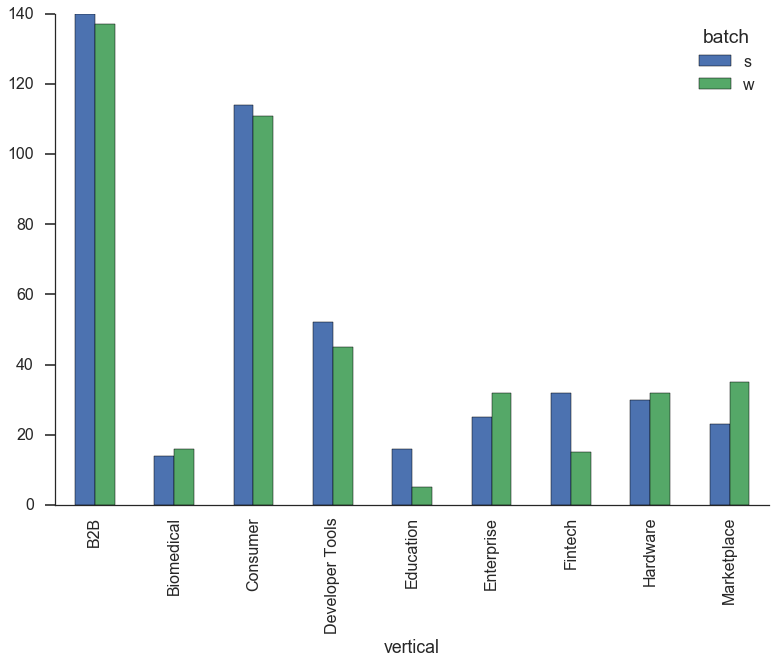

In [43]:
df.batch_type = df.batch.apply(lambda x: x[:1]).astype('category')
df.name.groupby([df.vertical, df.batch_type]).count().unstack().plot.bar()
sns.despine()

### How do company names compare with their descriptions?

In [368]:
# # show the entire description
pd.set_option('display.max_colwidth', -1)

# B2B companies
df_B2B = df[df['vertical'] == 'B2B'].copy()
df_B2B[['name', 'description']]

# df[df['vertical'] == 'Consumer']

,name,description
0,Clickfacts,NaN
9,Wufoo,Online form builder.
20,Weebly,"Weebly is the complete platform to grow your business online, with websites, ecommerce and marketing tools built in. Over 40M people have launched their business on Weebly and every month 300M people visit a Weebly-made site, or 33% of the US."
27,Disqus,Add comments to your website.
28,Dropbox,Backup and share files in the cloud.
40,Backtype,NaN
41,CO2Stats,NaN
44,Poll Everywhere,Live audience feedback
52,Volantio,Marketing automation and targeting for the travel industry (previously/also Adioso)
53,Wattvision,"Sensors and software for energy tracking. Like 'fitbit' for your house. Customers include universities, energy auditors, landlords, and consumers."


In [369]:
###########  Code I don't want to throw away yet



# # make subplots
# fig, ax = plt.subplots(2,1)
# # data
# s_batch['vertical'].value_counts(normalize = True).plot(kind = 'bar', rot = 45, ax = ax[0])
# w_batch['vertical'].value_counts(normalize = True).plot(kind = 'bar', rot = 45, ax = ax[1])

# # titles 
# ax[0].set_title('summer batch')
# ax[1].set_title('Winter batch')
# # labels
# ax[1].set_xlabel('Field')
# ax[0].set_ylabel('Relative frequencies')
# ax[1].set_ylabel('Relative frequencies')

# # aesthetics
# sns.despine()
# plt.tight_layout()


#####  Plotting relative frequency


# # make subplots
# # fig, ax = plt.subplots(2,1)
# # data
# s_batch['year'].value_counts(normalize = True)\
#     .plot(kind = 'bar',label = 'summer', position = 0,width =0.4,  rot = 45, color='#FD5C64')
# w_batch['year'].value_counts(normalize = True)\
#     .plot( kind = 'bar',label = 'winter', position= 1, width = 0.4, rot = 45)

# # title
# plt.title('summer and Winter Batches')
# # labels
# plt.legend()
# plt.xlabel('Year')
# plt.ylabel('Relative frequencies')
# # aesthetics

# sns.despine()
# plt.show()


# # Double checking the numbers
# # There are 450 companies in the summer
# # 80 companies are summer 2015
# # 80/450 = 18%



# fig, ax = plt.subplots(figsize=(10,5))
# df['batch'].value_counts(normalize= False, ascending = True).plot(kind = 'bar', rot = 45)
# plt.xlabel('Season and Year')
# plt.ylabel('Count')
# sns.despine()


###### Histogram, x-ticks are off
# fig, ax = plt.subplots(figsize = (10,5))

# labels = ['summer', 'Winter']
# ax.hist([s_batch['year'], w_batch['year']], label = labels, normed = False, color = ['#FD5C64', 'c'])



# ax.legend(loc = 'best')
# ax.set_ylabel('count')

# ax.set_xlabel('Year')
# ax.set_xlim(2005, 2016)
# ax.set_xticks(range(2005, 2017, 1))
# sns.despine()

# Double checking numbers...
# 180 s2016 companies out of 450 summer companies
# equals ~40%






######## Attempts to plot seasonal data on same plot
# fig, ax = plt.subplots(2,1, figsize=(15,5))

# # data
# s_batch.year.value_counts(sort = False)\
#     .plot(kind = 'barh',label = 'summer', position = 0, width =0.2, color='#FD5C64', ax = ax[0])
# w_batch['year'].value_counts(sort = False)\
#     .plot(kind = 'barh',label = 'winter', position= 1.5, width = 0.2, ax = ax[1])



# # title
# ax[0].set_title('summer and Winter Batches')
# # labels
# plt.legend(loc = 'best')
# ax[1].set_xlabel('Number of companies')
# # plt.xticks(np.arange(0, 120, 10))
# plt.ylabel('Year')
# # aesthetics

# sns.despine()
# plt.tight_layout
# plt.show()

# # Plotting the two bar plots in the same plot mixes the data up. i.e. 2015 and 2016 get flipped

"Code I don't want to throw away yet"